# insertion sort

In [1]:
def insertionSort(arr):
    comparison = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        while j >= 0 and arr[j] > key:
            comparison += 1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

    return arr, comparison

# merge sort

In [2]:
def mergeSort(arr):
    if len(arr) <= 1:
        return arr, 0  # Return 0 comparisons for empty or single-element arrays
    
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    
    left, left_comparisons = mergeSort(left)
    right, right_comparisons = mergeSort(right)
    
    merged, merge_comparisons = merge(left, right)
    
    return merged, left_comparisons + right_comparisons + merge_comparisons
 
def merge(left, right):
    result = []
    i = j = 0
    comparisons = 0
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
        comparisons += 1  # Count each comparison
        
    # im not sure why but this caused an error, i dont think changing it affects anything but you can check
    # result += left[i:]
    # result += right[j:]
    result.extend(left[i:])
    result.extend(right[j:])
    
    return result, comparisons

# hybrid sort

In [3]:
def hybridSort(arr, S):
    mid = len(arr)//2
    if (len(arr) <= S):
        sorted_arr, comparisons = insertionSort(arr)
        return sorted_arr, comparisons
    else:
        left, left_comparisons = hybridSort(arr[:mid], S)
        right, right_comparisons = hybridSort(arr[mid:], S)
        merged, merge_comparisons = merge(left, right)
        return merged, left_comparisons + right_comparisons + merge_comparisons    


In [4]:
arr = [0, 10, 6, 2, 1, 8, 7, 4, 3, 9, 12, 18, 100]
insertion_sorted, insertion_comparisons = insertionSort(arr.copy())
merge_sorted, merge_comparisons = mergeSort(arr.copy())
hybrid_sorted, hybrid_comparisons = hybridSort(arr.copy(), 3)
print("Insertion Sort result:", insertion_sorted)
print("Merge Sort result:", merge_sorted)
print("Hybrid Sort result:", hybrid_sorted)

print("Insertion Sort Comparisons:", insertion_comparisons)
print("Merge Sort Comparisons:", merge_comparisons)
print("Hybrid Sort Comparisons:", hybrid_comparisons)

Insertion Sort result: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 18, 100]
Merge Sort result: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 18, 100]
Hybrid Sort result: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 18, 100]
Insertion Sort Comparisons: 19
Merge Sort Comparisons: 30
Hybrid Sort Comparisons: 25


# Generating random numbers

In [5]:
import random

In [6]:
randomlist = random.sample(range(0, 1000), 1000)
print(randomlist)

[630, 751, 650, 320, 722, 587, 847, 750, 323, 684, 186, 399, 904, 996, 894, 356, 913, 721, 970, 27, 366, 988, 642, 911, 67, 398, 866, 116, 412, 585, 879, 36, 781, 980, 633, 326, 920, 758, 972, 358, 335, 660, 248, 344, 354, 51, 614, 239, 643, 767, 559, 513, 790, 112, 762, 701, 638, 666, 497, 500, 538, 526, 843, 943, 621, 530, 445, 578, 938, 22, 815, 375, 230, 90, 316, 246, 441, 149, 396, 707, 799, 118, 447, 343, 740, 195, 69, 978, 397, 838, 240, 74, 582, 167, 699, 176, 218, 906, 857, 874, 951, 809, 926, 216, 52, 405, 667, 105, 696, 974, 485, 224, 308, 449, 332, 279, 533, 349, 517, 236, 28, 165, 125, 719, 615, 293, 483, 31, 386, 306, 612, 446, 73, 716, 233, 44, 146, 103, 831, 214, 816, 137, 888, 289, 79, 852, 521, 234, 88, 432, 255, 982, 657, 220, 606, 523, 252, 863, 639, 733, 691, 39, 9, 755, 378, 425, 277, 299, 912, 608, 381, 581, 336, 24, 805, 168, 735, 822, 818, 971, 675, 64, 46, 287, 304, 322, 705, 553, 786, 845, 152, 481, 759, 717, 718, 388, 505, 314, 813, 932, 889, 828, 78, 178, 4

In [7]:
insertion_sorted, insertion_comparisons = insertionSort(randomlist.copy())
merge_sorted, merge_comparisons = mergeSort(randomlist.copy())
hybrid_sorted, hybrid_comparisons = hybridSort(randomlist.copy(), 10)
# print("Insertion Sort result:", insertion_sorted)
# print("Merge Sort result:", merge_sorted)
# print("Hybrid Sort result:", hybrid_sorted)

print("Insertion Sort Comparisons:", insertion_comparisons)
print("Merge Sort Comparisons:", merge_comparisons)
print("Hybrid Sort Comparisons:", hybrid_comparisons)

Insertion Sort Comparisons: 245290
Merge Sort Comparisons: 8707
Hybrid Sort Comparisons: 8443


### Generating Test data

In [42]:
from numpy import random
x = 10000 #largest value for dataset

In [43]:
data_1k = random.randint(0, x, size=(1000)) # 1 000
data_10k = random.randint(0, x, size=(10000)) # 10 000
data_100k = random.randint(0, x, size=(100000)) # 100 000
data_1M = random.randint(0, x, size=(1000000)) # 1 000 000
data_10M = random.randint(0, x, size=(10000000)) # 10 000 000

data_1k.tolist()
data_10k.tolist()
data_100k.tolist()
data_1M.tolist()
data_10M.tolist()

[9064,
 8308,
 5119,
 1621,
 887,
 2082,
 2534,
 7162,
 8057,
 8160,
 4172,
 8518,
 8409,
 3772,
 9339,
 6563,
 8566,
 7277,
 5301,
 9723,
 4944,
 2711,
 6733,
 8626,
 7382,
 2285,
 2545,
 6135,
 7867,
 8814,
 2694,
 481,
 3165,
 5981,
 3567,
 2964,
 2163,
 7507,
 2273,
 7975,
 7953,
 1993,
 520,
 7553,
 6672,
 7634,
 3667,
 9892,
 3781,
 7294,
 6798,
 1979,
 5810,
 7204,
 1151,
 5765,
 9121,
 9985,
 4479,
 8077,
 1674,
 3503,
 7023,
 9631,
 1665,
 7052,
 4558,
 4848,
 1803,
 680,
 8791,
 842,
 9790,
 9159,
 4887,
 4738,
 5043,
 744,
 7112,
 1750,
 2191,
 1734,
 6728,
 4781,
 4265,
 2304,
 5821,
 7198,
 7629,
 8664,
 6364,
 9223,
 6567,
 3244,
 3308,
 6175,
 3534,
 5442,
 6911,
 705,
 9856,
 1167,
 9328,
 158,
 3752,
 6642,
 7645,
 1313,
 8750,
 9200,
 1392,
 7461,
 5457,
 1792,
 407,
 4827,
 5022,
 3772,
 5043,
 7130,
 622,
 6827,
 3083,
 3678,
 5892,
 7307,
 8291,
 2828,
 7989,
 5365,
 7442,
 2578,
 4622,
 6037,
 7591,
 8007,
 3440,
 6046,
 1865,
 4121,
 4136,
 5559,
 8279,
 7720,
 9

---
# Time complexity analysis

In [10]:
# imports
import matplotlib.pyplot as plt
import math
import numpy as np

In [11]:
# calculate theoretical
def worstcase(S, n):
    # worst case: O(nS + nlog2(n/S))
    sum = n*S + n*math.log((n/S), 2)

    return sum
    
def bestcase(S, n):
    # best case: O(n + nlog2(n/S))
    sum = n + n*math.log((n/S), 2)

    return sum

In [57]:
# part i NOTE: idk what the deal is but make sure to rerun the create dataset before each test of this
# NOTE this chunk runs the 10 mil data set, remove if its slow

S = 15
theo_wc = []
theo_bc = []

# tests = [data_1k, data_10k, data_100k, data_1M, data_10M]
tests = [data_1k, data_10k, data_100k, data_1M]

keycomps = np.zeros(len(tests))

for i in range(len(tests)):
    # get data
    print(len(tests[i]))
    merged, keycomps[i] = hybridSort(tests[i], S)

    # calculate worst case
    theo_wc.append(worstcase(S, len(tests[i])))
    theo_bc.append(bestcase(S, len(tests[i])))


1000
10000
100000
1000000


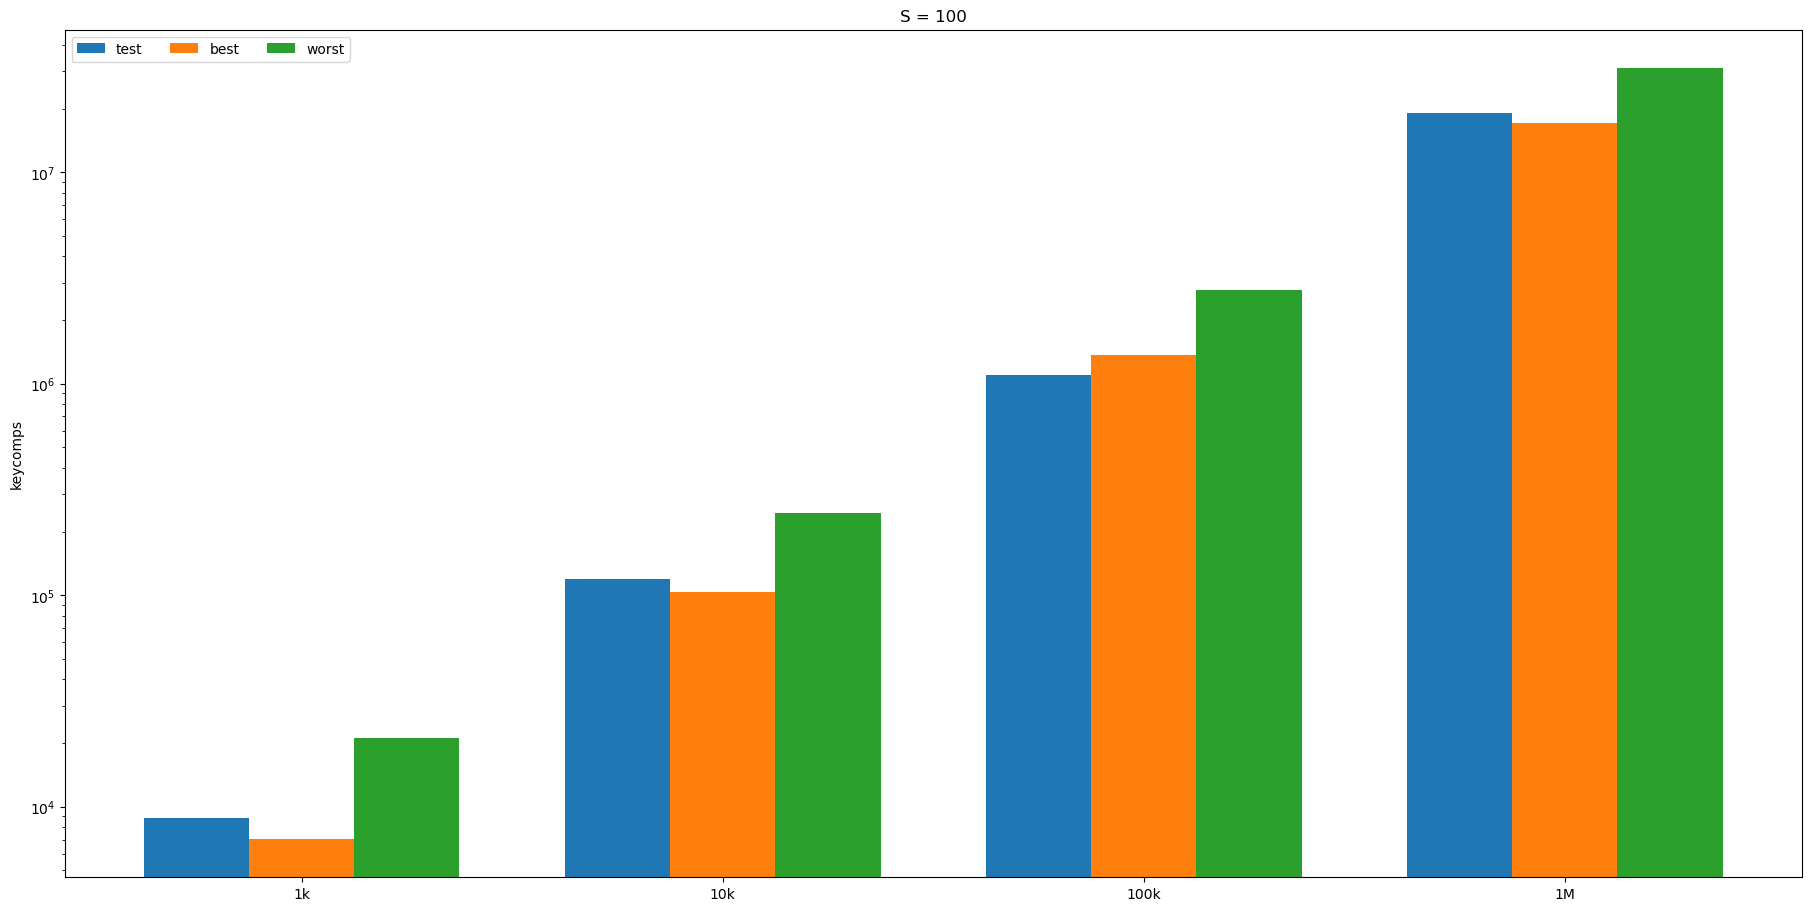

In [60]:
# draw graphs
# name = ["1k", "10k", "100k", "1M", "10M"]
name = ["1k", "10k", "100k", "1M"]

data_i = {
    "test": keycomps,
    "best": theo_bc,
    "worst": theo_wc
}

x = np.arange(len(name))

width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(18, 9))

for attribute, measurement in data_i.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_yscale('log')

ax.set_ylabel('keycomps')
ax.set_title('S = 100')
ax.set_xticks(x + width, name)
ax.legend(loc='upper left', ncol=3)


In [82]:
# part ii NOTE: idk what the deal is but make sure to rerun the create dataset before each test of this

# max value of S
maxS = 100
interval = 5
loops = 3

S = 0
keycomps = np.zeros(int(maxS/interval))

theo_wc = []
theo_bc = []

test = [random.randint(0, 10000, size=(100000)), random.randint(0, 10000, size=(100000)), random.randint(0, 10000, size=(100000))]

for i in range(len(keycomps)):
    S = S + interval
    # get data
    print(S)
    temp = 0
    total = 0

    for j in range(loops):
        merged, temp = hybridSort(test[j], S)
        total += temp
    
    keycomps[i] = total/loops

    # calculate worst case
    # theo_wc.append(worstcase(S, len(test)))
    # theo_bc.append(bestcase(S, len(test)))

# print(keycomps)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


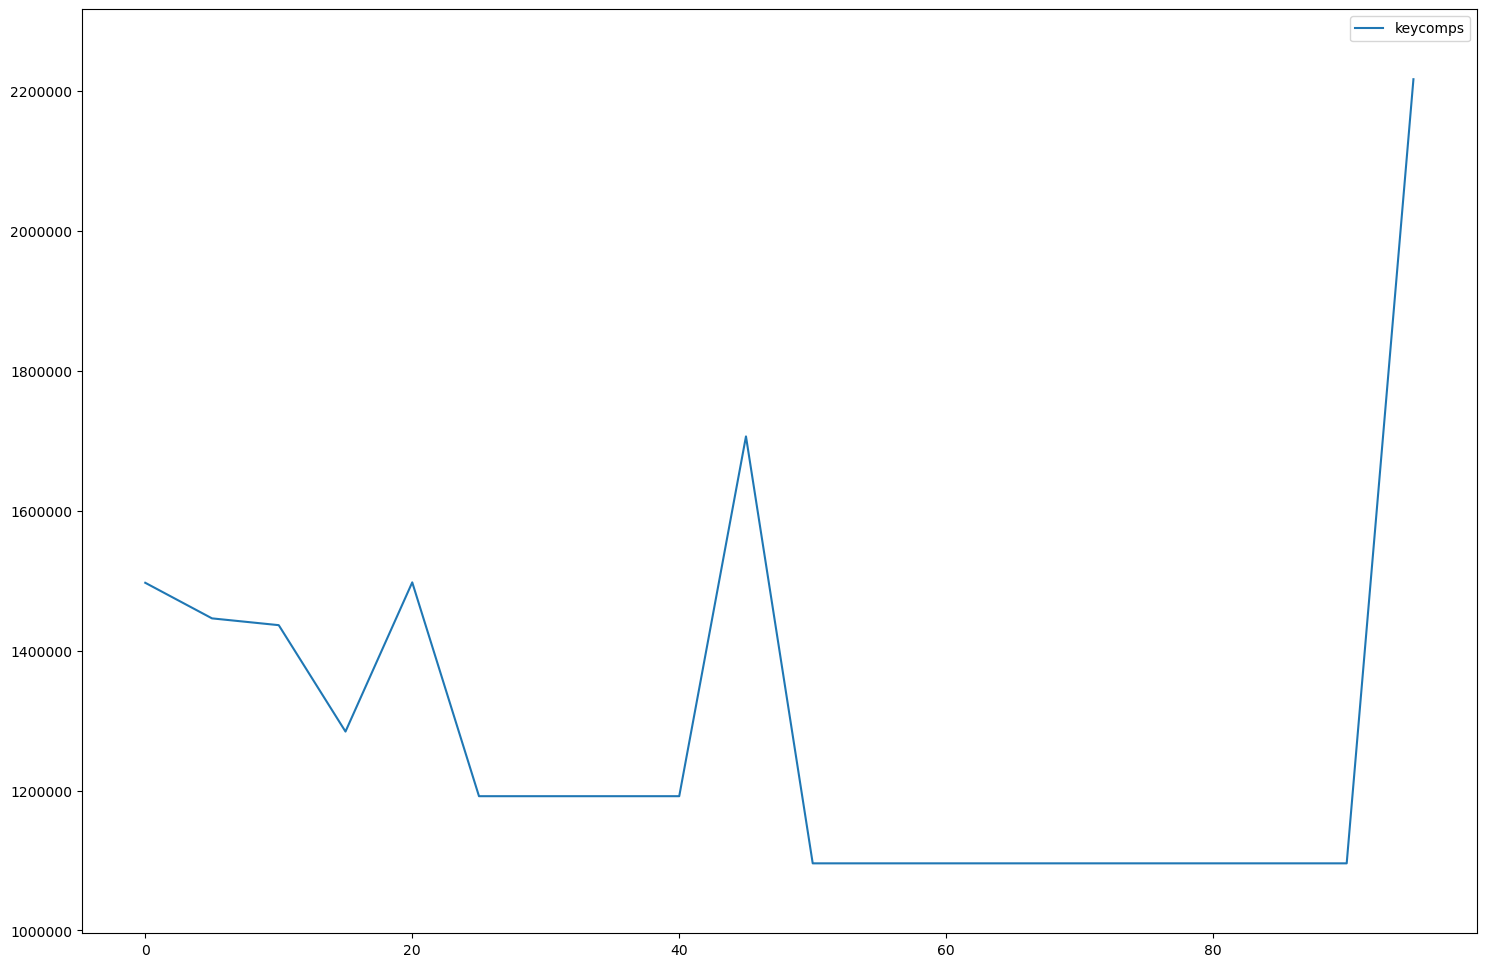

In [83]:
# draw graphs
x = np.arange(0, maxS, interval)

plt.figure(figsize=(18, 12))
plt.ylim(keycomps.min()-100000, keycomps.max()+100000)
plt.ticklabel_format(scilimits=(-5, 8))
# plt.yscale('log')

plt.plot(x, keycomps, label = "keycomps")

# no need test case plot
# plt.plot(x, theo_bc, label = "best case")
# plt.plot(x, theo_wc, label = "worst case")

plt.legend()

In [84]:
print(keycomps)

print(keycomps.min())
print(np.where(keycomps == keycomps.min()))

[1497143.33333333 1446243.33333333 1436538.66666667 1284386.66666667
 1497738.33333333 1191980.66666667 1191980.66666667 1191980.66666667
 1191980.66666667 1706408.         1095954.         1095954.
 1095954.         1095954.         1095954.         1095954.
 1095954.         1095954.         1095954.         2217209.66666667]
1095954.0
(array([10, 11, 12, 13, 14, 15, 16, 17, 18], dtype=int64),)


----
testing

In [17]:
def modHybridSort(arr, S, depth):
    mid = len(arr)//2
    if (len(arr) <= S):
        sorted_arr, comparisons = insertionSort(arr)
        return sorted_arr, comparisons, depth
    else:
        depth += 1
        left, left_comparisons, depthl = modHybridSort(arr[:mid], S, depth)
        right, right_comparisons, depthr = modHybridSort(arr[mid:], S, depth)
        merged, merge_comparisons = merge(left, right)
        
        if(depthl < depthr):
            depth = depthr
        else:
            depth = depthl
            
        return merged, left_comparisons + right_comparisons + merge_comparisons, depth


In [27]:
tries = 1000

test_data = np.zeros(tries)
test_depth = np.zeros(tries)
S = 10

for i in range(tries):
    test = random.randint(0, 10000, size=(1000))

    # get data
    merged, test_data[i], test_depth[i] = (modHybridSort(test, S, 0))

In [28]:
from statistics import mean 

print(mean(test_data))
print(mean(test_depth))

8472.044
7.0
